In [1]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization

In [2]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

MNIST Model

In [3]:
train_df = pd.read_csv(os.path.join('.', 'archive', 'sign_mnist_train', 'sign_mnist_train.csv'))
test_df = pd.read_csv(os.path.join('.', 'archive', 'sign_mnist_test', 'sign_mnist_test.csv'))

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
num_classes = 24
train_labels = train_df['label']
test_labels = test_df['label']
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(train_labels)
y_test = label_binarizer.fit_transform(test_labels)

train_imgs = ((train_df.loc[:, train_df.columns != 'label']).values/255).reshape(-1,28,28,1)
test_imgs = ((test_df.loc[:, test_df.columns != 'label']).values/255).reshape(-1,28,28,1)

0


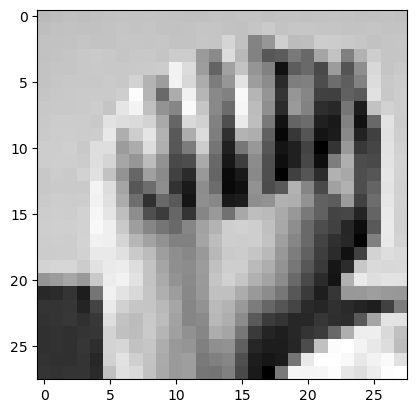

In [5]:
plt.imshow(test_imgs[3], cmap = "gray")
print(test_labels[3])

In [76]:
# t_transform = ImageDataGenerator(
#     horizontal_flip=True,
#     zoom_range=0.2,
#     width_shift_range=0.1, 
#     height_shift_range=0.1,
#     fill_mode='nearest'
# )

t_transform = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

t_generator = t_transform.fit(train_imgs)

In [81]:
# model = models.Sequential()
# model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.BatchNormalization())

# model.add(layers.Flatten())

# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes, activation='softmax'))

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 28, 28, 75)        750       
                                                                 
 batch_normalization_20 (Bat  (None, 28, 28, 75)       300       
 chNormalization)                                                
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 75)       0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 14, 14, 50)        33800     
                                                                 
 dropout_5 (Dropout)         (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 14, 14, 50)      

In [82]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

TypeError: Invalid keyword argument(s) in `compile()`: ({'callbacks'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

In [83]:
history = model.fit(t_transform.flow(train_imgs, y_train, batch_size = 128), epochs = 20, validation_data = (test_imgs, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 35s 158ms/step - loss: 1.0651 - accuracy: 0.6632 - val_loss: 4.3656 - val_accuracy: 0.0816 - lr: 0.0010
Epoch 2/20
215/215 [==============================] - 36s 167ms/step - loss: 0.2081 - accuracy: 0.9323 - val_loss: 1.2382 - val_accuracy: 0.5839 - lr: 0.0010
Epoch 3/20
215/215 [==============================] - 45s 211ms/step - loss: 0.0996 - accuracy: 0.9681 - val_loss: 0.4183 - val_accuracy: 0.8507 - lr: 0.0010
Epoch 4/20
215/215 [==============================] - 47s 218ms/step - loss: 0.0664 - accuracy: 0.9781 - val_loss: 0.0999 - val_accuracy: 0.9679 - lr: 0.0010
Epoch 5/20
215/215 [==============================] - 45s 210ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0359 - val_accuracy: 0.9887 - lr: 0.0010
Epoch 6/20
215/215 [==============================] - 50s 231ms/step - loss: 0.0394 - accuracy: 0.9874 - val_loss: 0.1615 - val_accuracy: 0.9459 - lr: 0.0010
Epoch 7/20
215/215 [==============================] 

In [2]:
model.save("mnist_asl_model2.keras")

NameError: name 'model' is not defined

In [6]:
model = load_model('mnist_asl_model.keras')

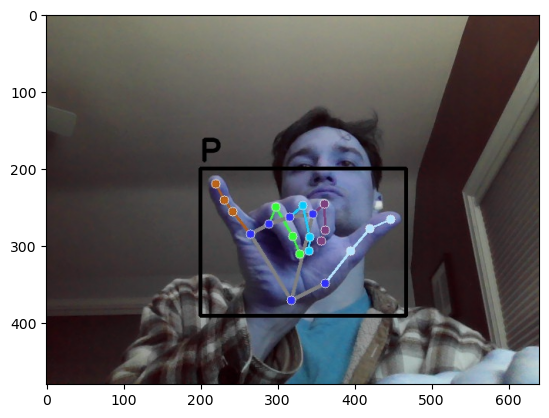

In [7]:
img = cv2.imread('frame.jpg')
plt.imshow(img)

In [8]:
# nimg = (np.array(img)/255).reshape(-1, 28, 28, 1)
# gimg = (cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)/255).reshape(-1, 28, 28, 1)
hand_frame = (cv2.resize(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)[220:371, 220:447],(28,28))/255).reshape(-1, 28, 28, 1)

In [24]:
# plt.imshow(hand_frame)
print(hand_frame)

[[[[0.34117647]
   [0.50588235]
   [0.29411765]
   [0.28627451]
   [0.29019608]
   [0.29803922]
   [0.29803922]
   [0.30588235]
   [0.30196078]
   [0.30196078]
   [0.06666667]
   [0.26666667]
   [0.38039216]
   [0.41176471]
   [0.41176471]
   [0.19215686]
   [0.4       ]
   [0.45882353]
   [0.45882353]
   [0.54509804]
   [0.59215686]
   [0.58823529]
   [0.60392157]
   [0.57254902]
   [0.48627451]
   [0.16862745]
   [0.3254902 ]
   [0.32941176]]

  [[0.34509804]
   [0.45882353]
   [0.30588235]
   [0.30980392]
   [0.31372549]
   [0.31764706]
   [0.32156863]
   [0.32941176]
   [0.33333333]
   [0.33333333]
   [0.09019608]
   [0.23921569]
   [0.32941176]
   [0.36862745]
   [0.43137255]
   [0.41176471]
   [0.30980392]
   [0.34117647]
   [0.35294118]
   [0.50196078]
   [0.53333333]
   [0.57254902]
   [0.56862745]
   [0.56470588]
   [0.4745098 ]
   [0.42352941]
   [0.33333333]
   [0.33333333]]

  [[0.2745098 ]
   [0.4       ]
   [0.32941176]
   [0.32941176]
   [0.3254902 ]
   [0.32941176]
   [

In [13]:
prediction = model.predict(hand_frame)

1/1 [==============================] - 0s 30ms/step


In [35]:
letterpred = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']
predarray = np.array(prediction[0])
letter_prediction_dict = {letterpred[i]: predarray[i] for i in range(len(letterpred))}
predarrayordered = sorted(predarray, reverse=True)

In [14]:
np.flip(np.argsort(prediction[0]))

array([ 4,  1,  5, 13,  7, 15, 22, 14,  8, 21, 11,  9, 18,  0, 17, 19, 10,
        3,  2, 16,  6, 23, 12, 20], dtype=int64)

In [38]:
high1 = predarrayordered[0]
high2 = predarrayordered[1]
high3 = predarrayordered[2]
for key,value in letter_prediction_dict.items():
            if value==high1:
                print("Predicted Character 1: ", key)
                print('Confidence 1: ', 100*value)
            elif value==high2:
                print("Predicted Character 2: ", key)
                print('Confidence 2: ', 100*value)
            elif value==high3:
                print("Predicted Character 3: ", key)
                print('Confidence 3: ', 100*value)

Predicted Character 1:  F
Confidence 1:  48.75620901584625
Predicted Character 2:  P
Confidence 2:  42.37469434738159
Predicted Character 3:  Y
Confidence 3:  5.136147513985634


In [41]:
prediction

array([[3.5717163e-02, 1.7774697e-04, 1.0236985e-05, 3.6445039e-05,
        2.4849447e-05, 4.8756209e-01, 1.6016629e-05, 3.3976846e-06,
        4.0753945e-04, 1.4785628e-06, 8.3931541e-04, 1.6600860e-10,
        1.3273825e-08, 7.4173549e-08, 4.2374694e-01, 8.6935799e-11,
        5.2516845e-11, 1.7401842e-07, 8.9008296e-07, 9.0847003e-08,
        1.8820733e-08, 5.4387066e-05, 3.9681177e-05, 5.1361475e-02]],
      dtype=float32)